# UCF-Crime Anomaly Detection - Colab Setup

Setup notebook for running MIL Ranking Loss re-implementation on Google Colab.

## 1. Check GPU

In [32]:
!nvidia-smi

# Verify PyTorch can use GPU
import torch
print(f"\nPyTorch CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

Sun Nov 30 09:06:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             33W /   70W |     466MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. Mount Google Drive

**Prerequisites:**
1. Upload features.zip and annotations.zip to Google Drive
2. Google Drive structure:
```
MyDrive/
└── Colab Notebooks/
    └── data_distribution/
        ├── features.zip
        └── annotations.zip
```

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Clone Repository

In [ ]:
!git clone https://github.com/KwonPodo/MILRankingLoss_Sultani2018_ReImplementation.git
%cd MILRankingLoss_Sultani2018_ReImplementation

## 4. Install Packages

**Note:** Using `requirements-colab.txt` to avoid package conflicts

In [34]:
# Install minimal packages for Colab (avoid conflicts)
!pip install -r requirements-colab.txt -q

# Check installed package versions
import torch
import numpy as np
print(f"PyTorch: {torch.__version__}")
print(f"NumPy: {np.__version__}")

PyTorch: 2.9.0+cu126
NumPy: 2.0.2


## 5. Extract Data

Extract features from Google Drive.

In [ ]:
import os

# Verify working directory
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!pwd

# Create data directory
!mkdir -p data

# Google Drive path
DRIVE_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/data_distribution'

# Extract features
!cp "{DRIVE_DATA_PATH}/features.zip" data/
!unzip -q data/features.zip -d data/
!rm data/features.zip

print("Features extracted")
!ls -lh data/

## 6. Extract Annotations

Extract annotation files from Google Drive.

In [ ]:
# Extract annotations from Google Drive
!cp "{DRIVE_DATA_PATH}/annotations.zip" data/
!unzip -q data/annotations.zip -d data/
!rm data/annotations.zip

print("Annotations extracted")
!ls -lh data/annotations/

## 7. Verify Dataset

In [36]:
# Verify working directory
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Check feature categories
!ls data/features/

# Check sample counts
!echo "Train samples:"
!wc -l data/annotations/train_set.txt
!echo "Test samples:"
!wc -l data/annotations/test_set.txt

/content/MILRankingLoss_Sultani2018_ReImplementation
Abuse	Assault    Fighting	  Shooting     Testing_Normal_Videos_Anomaly
Arrest	Burglary   RoadAccidents  Shoplifting  Training_Normal_Videos_Anomaly
Arson	Explosion  Robbery	  Stealing     Vandalism
Train samples:
1610 data/annotations/train_set.txt
Test samples:
290 data/annotations/test_set.txt


## 8. Test Dataset Loading

In [37]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python scripts/test_dataset.py

/content/MILRankingLoss_Sultani2018_ReImplementation
Total samples in dataset: 1610
Positive samples: 810
Negative samples: 800

First batch:

Positive bags: torch.Size([30, 32, 4096])

Negative bags: torch.Size([30, 32, 4096])
Batch 0: pos=30, neg=30
Batch 1: pos=30, neg=30
Batch 2: pos=30, neg=30
Batch 3: pos=30, neg=30


## 9. Test Model

In [38]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python scripts/test_model.py

/content/MILRankingLoss_Sultani2018_ReImplementation
Model architecture:
AnomalyDetector(
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.6, inplace=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

Total parameters: 2,114,113

Positive scores shape: torch.Size([30, 32])
Negative scores shape: torch.Size([30, 32])
Score range: [0.4727, 0.5831]

Total loss: 1.0426
  Ranking loss: 1.0021
  Smoothness loss: 0.5288
  Sparsity loss: 505.4616

Training mode loss: 1.0402


## 10. Start Training

### Option 1: Train without WandB

In [ ]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python train.py --config configs/default.yaml --no-wandb

## 11. Evaluate

Evaluate trained model.

In [39]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation
!PYTHONPATH=/content/MILRankingLoss_Sultani2018_ReImplementation:$PYTHONPATH python evaluate.py \
    --config configs/default.yaml \
    --checkpoint checkpoints/best_model.pth \
    --temporal-annotation data/annotations/Temporal_Anomaly_Annotation_for_Testing_Videos.txt

/content/MILRankingLoss_Sultani2018_ReImplementation
Loaded config from configs/default.yaml
Using device: cuda
Loaded model from checkpoints/best_model.pth
Epoch: 64, Loss: 1.0014
Test dataset: 290 videos
Loaded temporal annotations for 290 videos

Evaluating model...
Evaluating: 100% 290/290 [00:12<00:00, 22.69it/s]

Total segments evaluated: 9280
Anomaly segments: 1685 (18.2%)
Normal segments: 7595 (81.8%)

Calculating ROC curve...
ROC curve saved to results/roc_curve.png

AUC: 0.6940
Results saved to results/evaluation_results.json

Optimal threshold: 0.0854
  TPR: 0.6089
  FPR: 0.2999

Summary saved to results/evaluation_summary.txt


## 12. View Results

/content/MILRankingLoss_Sultani2018_ReImplementation


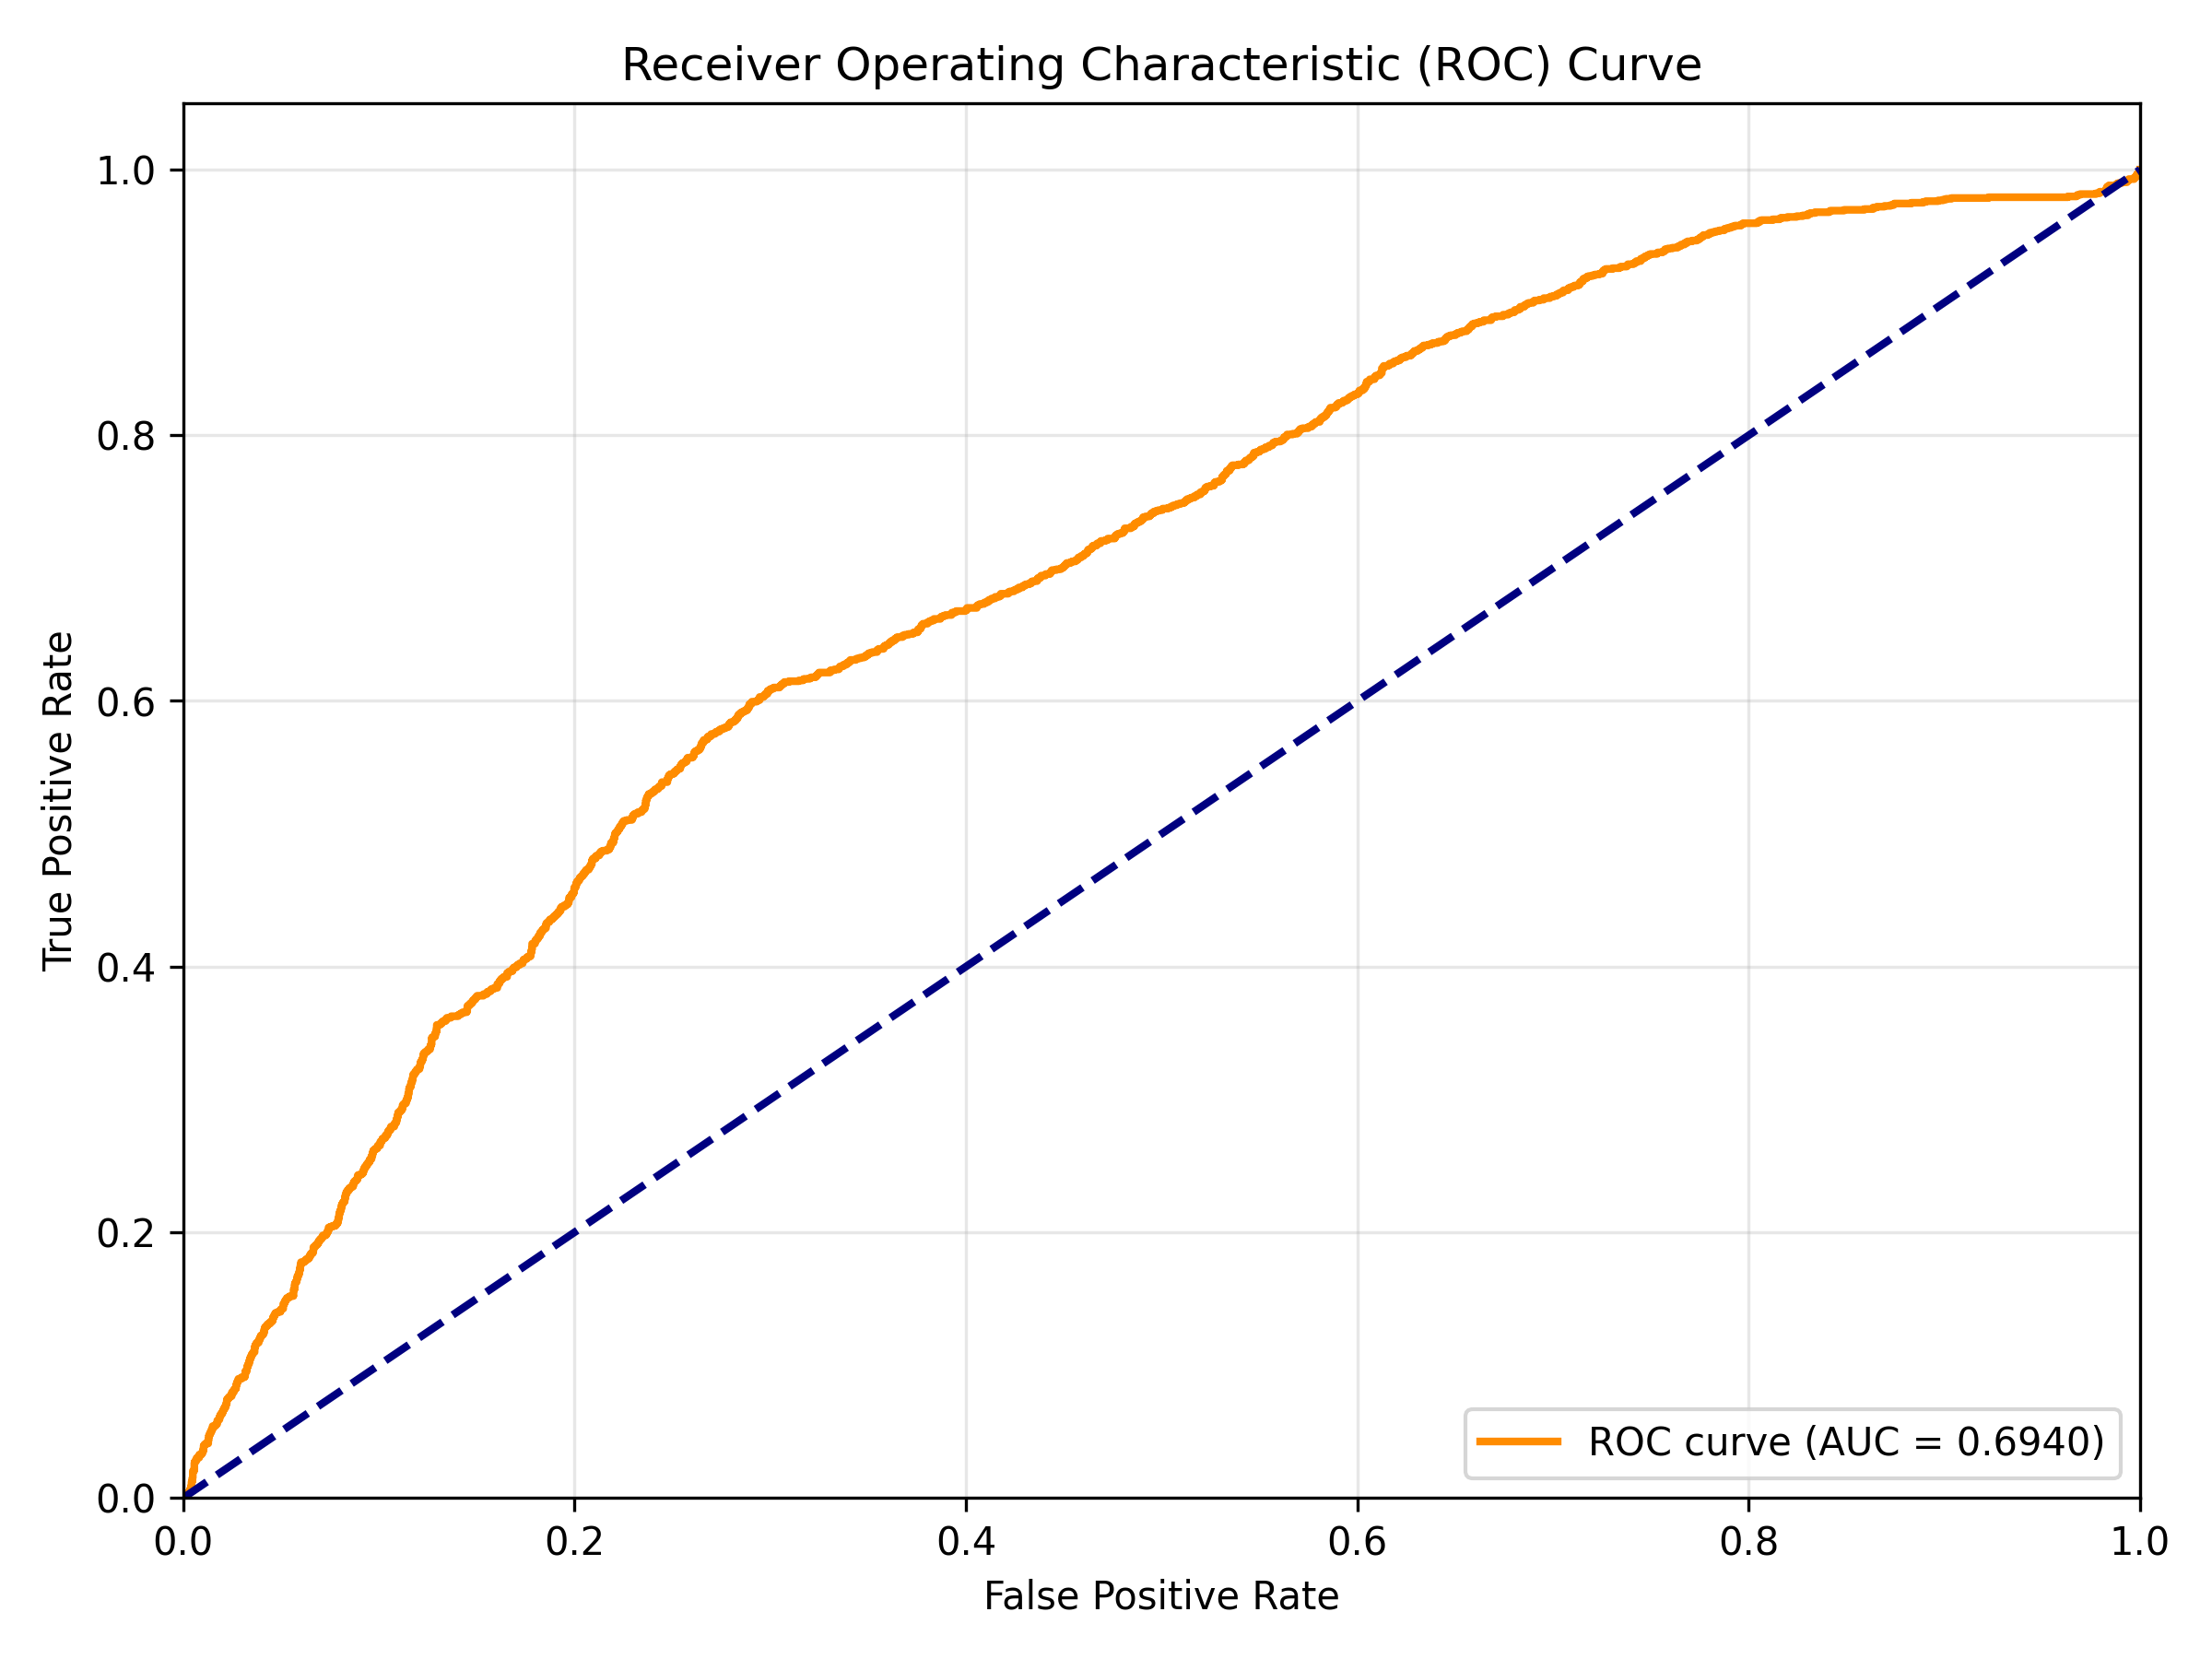

Evaluation Summary
Model: checkpoints/best_model.pth
Test videos: 290
Total segments: 9280
Anomaly segments: 1685 (18.2%)

Results:
  AUC: 0.6940
  Optimal threshold: 0.0854
  TPR at optimal: 0.6089
  FPR at optimal: 0.2999


In [40]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Display ROC curve
from IPython.display import Image, display
import os

if os.path.exists('results/roc_curve.png'):
    display(Image('results/roc_curve.png'))

# Print evaluation results
if os.path.exists('results/evaluation_summary.txt'):
    !cat results/evaluation_summary.txt

## 13. (Optional) Save Results to Google Drive

In [41]:
%cd /content/MILRankingLoss_Sultani2018_ReImplementation

# Backup checkpoints and results to Drive
DRIVE_DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/data_distribution'
!mkdir -p "{DRIVE_DATA_PATH}/results"
!cp -r checkpoints "{DRIVE_DATA_PATH}/"
!cp -r results "{DRIVE_DATA_PATH}/"

print("Results saved to Google Drive")

/content/MILRankingLoss_Sultani2018_ReImplementation
Results saved to Google Drive


My new model:

In [4]:
import torch
import torch.nn as nn

class AnomalyDetector(nn.Module):
    def __init__(self, input_dim=4096, lstm_hidden_size=256, dropout=0.5, batch_norm=True, lstm_num_layers=3, attention=False):
        super(AnomalyDetector, self).__init__()

        # LSTM Layer
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, batch_first=True)

        # Fully Connected Layers
        self.fc1 = nn.Linear(lstm_hidden_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 32)
        self.fc4 = nn.Linear(32, 1)

        # Batch Normalization (optional)
        self.batch_norm = batch_norm
        if self.batch_norm:
            self.bn1 = nn.BatchNorm1d(512)
            self.bn2 = nn.BatchNorm1d(256)
            self.bn3 = nn.BatchNorm1d(32)

        # Dropout and activation
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # Attention mechanism (optional)
        if attention:
            self.attention = Attention(lstm_hidden_size)

    def forward(self, x):
        """
        Args:
            x: (batch_size, num_segments, feature_dim)
        """
        batch_size, num_segments, feature_dim = x.shape

        # Process through LSTM
        lstm_out, (hn, cn) = self.lstm(x)  # LSTM output for all time steps

        # Apply attention if specified
        if hasattr(self, 'attention'):
            x = self.attention(lstm_out)
        else:
            x = lstm_out[:, -1, :]  # (batch_size, lstm_hidden_size)

        # Fully connected layers with batch normalization and dropout
        x = self.fc1(x)
        if self.batch_norm:
            x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        if self.batch_norm:
            x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        if self.batch_norm:
            x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)  # Final layer
        x = self.sigmoid(x)  # Anomaly score in range [0, 1]

        return x  # Returning the anomaly score for the whole video

# Attention mechanism
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn_weights = nn.Parameter(torch.randn(hidden_size, 1))

    def forward(self, x):
        attn_scores = torch.matmul(x, self.attn_weights)  # Calculate attention scores
        attn_scores = torch.softmax(attn_scores, dim=1)   # Normalize them
        attn_output = torch.sum(attn_scores * x, dim=1)    # Weighted sum
        return attn_output


In [5]:
import torch
import torch.nn as nn

class MILRankingLoss(nn.Module):
    """
    Multiple Instance Learning Ranking Loss with sparsity and smoothness constraints.

    Loss formula from paper:
    loss = hinge_loss + λ1 * smoothness + λ2 * sparsity

    where:
    - hinge_loss = max(0, 1 - max(pos_scores) + max(neg_scores))
    - smoothness = sum of squared differences between adjacent segments
    - sparsity = sum of all positive bag scores
    """

    def __init__(self, lambda1=0.00008, lambda2=0.00008):
        super(MILRankingLoss, self).__init__()
        self.lambda1 = lambda1  # Regularization factor for smoothness
        self.lambda2 = lambda2  # Regularization factor for sparsity

    def forward(self, pos_scores, neg_scores):
        """
        Args:
            pos_scores (tensor): Scores for positive segments, shape (batch_size, num_segments)
            neg_scores (tensor): Scores for negative segments, shape (batch_size, num_segments)

        Returns:
            total_loss (tensor): The total ranking loss
            loss_dict (dict): Dictionary containing individual loss components
        """
        # Hinge Loss: Ensures that positive scores are greater than negative scores by at least 1
        pos_max = torch.max(pos_scores, dim=1)[0]  # Max score for positive segments (batch_size,)
        neg_max = torch.max(neg_scores, dim=1)[0]  # Max score for negative segments (batch_size,)

        # Hinge loss to ensure that positive scores are ranked higher than negative scores
        ranking_loss = torch.clamp(
            1.0 - pos_max.mean() + neg_max.mean(),
            min=0  # Only compute loss when this is positive
        )

        # Smoothness Loss: Encourages neighboring segments to have similar scores
        smoothness_loss = 0
        if pos_scores.size(1) > 1:  # Only compute if there are multiple segments
            temporal_diff = pos_scores[:, 1:] - pos_scores[:, :-1]  # Difference between adjacent segments
            smoothness_loss = torch.sum(temporal_diff ** 2)  # Sum of squared differences

        # Sparsity Loss: Encourages sparse anomaly scores (penalize high positive scores)
        sparsity_loss = torch.sum(pos_scores)  # Sum of all positive segment scores

        # Total loss combining ranking loss, smoothness, and sparsity
        total_loss = ranking_loss + self.lambda1 * smoothness_loss + self.lambda2 * sparsity_loss

        # Store individual losses for monitoring during training
        loss_dict = {
            'ranking_loss': ranking_loss.item(),
            'smoothness_loss': smoothness_loss.item() if isinstance(smoothness_loss, torch.Tensor) else 0.0,
            'sparsity_loss': sparsity_loss.item()
        }

        return total_loss, loss_dict

In [6]:
import os
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import Sampler
from pathlib import Path
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

class C3DFeatureDataset(Dataset):
    """
    Load pre-extracted C3D features for MIL-based anomaly detection.
    Features are already divided into 32 segments (clips).
    """
    def __init__(self, annotation_path, features_root, num_segments=32):
        """
        Args:
            annotation_path (str): Path to the annotation file (train/test split).
            features_root (str): Path to the root directory containing the feature files.
            num_segments (int): Expected number of segments (should be 32).
        """
        self.features_root = Path(features_root)
        self.num_segments = num_segments

        # Parse annotation file
        self.samples = []
        with open(annotation_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 2:
                    video_name, label = parts
                    self.samples.append({
                        'video_name': video_name,
                        'label': int(label)
                    })

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        sample = self.samples[idx]

        # Load C3D features
        feature_path = self.features_root / f"{sample['video_name']}.txt"
        features = self._load_features(feature_path)

        return {
            'features': torch.FloatTensor(features),  # (32, 4096)
            'label': sample['label'],
            'video_name': sample['video_name']
        }

    def _load_features(self, feature_path):
        """
        Load features from .txt file.
        Expected format: 32 lines, each with 4096 space-separated floats.
        """
        try:
            features = np.loadtxt(feature_path, dtype=np.float32)
        except Exception as e:
            logging.error(f"Error loading features for {feature_path}: {e}")
            return np.zeros((self.num_segments, 4096), dtype=np.float32)  # Return empty features on error

        # Sanity check with better error logging
        if features.shape != (self.num_segments, 4096):
            logging.error(f"Shape mismatch for {feature_path}: expected ({self.num_segments}, 4096), got {features.shape}")
            return np.zeros((self.num_segments, 4096), dtype=np.float32)  # Return empty features if there's an issue

        return features

# Balanced Batch Sampler to Ensure Equal Sampling of Positive and Negative Examples
class BalancedBatchSampler(Sampler):
    """
    Sampler that ensures each batch contains an equal number of positive and negative samples.
    """
    def __init__(self, dataset, batch_size):
        """
        Args:
            dataset (Dataset): The dataset to sample from.
            batch_size (int): The number of samples in each batch (must be even).
        """
        self.dataset = dataset
        self.batch_size = batch_size
        self.pos_indices = [i for i, sample in enumerate(dataset) if sample['label'] == 1]  # Positive samples
        self.neg_indices = [i for i, sample in enumerate(dataset) if sample['label'] == 0]  # Negative samples

    def __iter__(self):
        """
        Yield indices for batches of positive and negative samples.
        """
        # Shuffle positive and negative indices
        pos_sampler = torch.utils.data.sampler.SubsetRandomSampler(self.pos_indices)
        neg_sampler = torch.utils.data.sampler.SubsetRandomSampler(self.neg_indices)

        # Ensure that each batch has an equal number of positive and negative samples
        pos_iter = iter(pos_sampler)
        neg_iter = iter(neg_sampler)

        while True:
            # Get one positive sample and one negative sample
            pos_idx = next(pos_iter)
            neg_idx = next(neg_iter)

            yield [pos_idx, neg_idx]

    def __len__(self):
        """
        Return the number of batches in the dataset (based on the number of positive and negative samples).
        """
        return min(len(self.pos_indices), len(self.neg_indices))

# Custom Collate Function to Create Batches from DataLoader
def collate_fn(batch):
    """
    Custom collate function to handle the batching of positive and negative samples.

    Args:
        batch (list): List of samples from the dataset (each sample is a dictionary).

    Returns:
        dict: A dictionary containing the batched positive and negative samples.
    """
    pos_features, neg_features = [], []
    pos_labels, neg_labels = [], []
    pos_names, neg_names = [], []

    # Separate positive and negative samples
    for item in batch:
        if item['label'] == 1:
            pos_features.append(item['features'])
            pos_labels.append(item['label'])
            pos_names.append(item['video_name'])
        else:
            neg_features.append(item['features'])
            neg_labels.append(item['label'])
            neg_names.append(item['video_name'])

    # Stack to tensors and handle empty lists
    result = {}

    if pos_features:
        result['pos_features'] = torch.stack(pos_features)  # (num_pos, 32, 4096)
        result['pos_labels'] = torch.tensor(pos_labels)
        result['pos_names'] = pos_names
    else:
        result['pos_features'] = torch.zeros(0, 32, 4096)
        result['pos_labels'] = torch.zeros(0)
        result['pos_names'] = []

    if neg_features:
        result['neg_features'] = torch.stack(neg_features)  # (num_neg, 32, 4096)
        result['neg_labels'] = torch.tensor(neg_labels)
        result['neg_names'] = neg_names
    else:
        result['neg_features'] = torch.zeros(0, 32, 4096)
        result['neg_labels'] = torch.zeros(0)
        result['neg_names'] = []

    return result


In [7]:
def train_epoch(model, train_loader, criterion, optimizer, device, epoch):
    model.train()  # Set the model to training mode

    epoch_loss = 0.0
    for batch_idx, batch in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}")):
        pos_features = batch['pos_features'].to(device)
        neg_features = batch['neg_features'].to(device)

        # Forward pass
        pos_scores = model(pos_features)
        neg_scores = model(neg_features)

        # Compute loss
        loss, _ = criterion(pos_scores, neg_scores)

        # Backward pass and optimization step
        optimizer.zero_grad()  # Zero the gradients before the backward pass
        loss.backward()        # Backpropagate the loss
        optimizer.step()       # Update the model parameters

        epoch_loss += loss.item()  # Accumulate the loss for the epoch

    # Return the average loss for the epoch
    return epoch_loss / len(train_loader)

In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import torch.optim as optim
from pathlib import Path
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from torch.utils.data import Sampler
import random
from torch.optim.lr_scheduler import StepLR

# Balanced Batch Sampler for Balanced Batches of Positive and Negative Samples
class BalancedBatchSampler(Sampler):
    def __init__(self, dataset, batch_size=60):
        assert batch_size % 2 == 0, "Batch size must be even"
        self.batch_size = batch_size
        self.samples_per_class = batch_size // 2  # 30 each

        self.pos_indices = [i for i, sample in enumerate(dataset.samples) if sample['label'] == 1]
        self.neg_indices = [i for i, sample in enumerate(dataset.samples) if sample['label'] == 0]

        self.num_batches = min(
            len(self.pos_indices) // self.samples_per_class,
            len(self.neg_indices) // self.samples_per_class
        )

    def __iter__(self):
        pos_shuffled = random.sample(self.pos_indices, len(self.pos_indices))
        neg_shuffled = random.sample(self.neg_indices, len(self.neg_indices))

        for i in range(self.num_batches):
            pos_batch = pos_shuffled[i * self.samples_per_class : (i + 1) * self.samples_per_class]
            neg_batch = neg_shuffled[i * self.samples_per_class : (i + 1) * self.samples_per_class]
            batch = pos_batch + neg_batch
            random.shuffle(batch)
            yield batch

    def __len__(self):
        return self.num_batches

# Model Building
def build_model(config, device):
    model = AnomalyDetector(
        input_dim=config['model']['input_dim'],
        lstm_hidden_size=256,  # Set LSTM hidden size (fixed)
        dropout=config['model']['dropout'],
        batch_norm=config['model']['batch_norm'],
        lstm_num_layers=3,     # Set number of LSTM layers (fixed)
        attention=False         # Attention mechanism (optional)
    )
    model = model.to(device)
    return model

# Optimizer
def build_optimizer(model, config):
    optimizer_name = config['training']['optimizer'].lower()
    lr = config['training']['learning_rate']
    weight_decay = config['training']['lambda3']

    if optimizer_name == 'adamw':
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    return optimizer

# Evaluation: ROC Curve and AUC (without visualization)
def evaluate_new_model(model, test_loader, device):
    model.eval()
    all_labels = []
    all_scores = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            pos_features = batch['pos_features'].to(device)
            neg_features = batch['neg_features'].to(device)

            pos_scores = model(pos_features)
            neg_scores = model(neg_features)

            all_labels.extend([1] * pos_scores.size(0))  # Label 1 for positive
            all_labels.extend([0] * neg_scores.size(0))  # Label 0 for negative
            all_scores.extend(pos_scores.cpu().numpy())
            all_scores.extend(neg_scores.cpu().numpy())

    labels = np.array(all_labels)
    scores = np.array(all_scores)

    # Calculate ROC and AUC
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    return labels, scores, roc_auc

# Save Model Checkpoint
def save_checkpoint(model, optimizer, epoch, loss, checkpoint_dir='checkpoints'):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    save_path = Path(checkpoint_dir) / f'epoch_{epoch}.pth'
    torch.save(checkpoint, save_path)

# Main Training and Evaluation Process
def main(config):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Create directories for saving model checkpoints
    checkpoint_dir_new = Path('checkpoints/new_model')
    checkpoint_dir_new.mkdir(exist_ok=True)

    # Initialize Dataset, Model, Optimizer, Loss Function
    train_dataset = C3DFeatureDataset(
        annotation_path=config['data']['train_annotation_path'],
        features_root=config['data']['feature_path']
    )
    train_sampler = BalancedBatchSampler(train_dataset, batch_size=config['training']['batch_size'])
    train_loader = DataLoader(train_dataset, batch_sampler=train_sampler, collate_fn=collate_fn)

    # Create test_loader (validation using test dataset)
    test_dataset = C3DFeatureDataset(
        annotation_path=config['data']['test_annotation_path'],  # Test set used for validation
        features_root=config['data']['feature_path']
    )
    test_loader = DataLoader(test_dataset, batch_size=config['training']['batch_size'], collate_fn=collate_fn)

    model = build_model(config, device)
    optimizer = build_optimizer(model, config)
    criterion = MILRankingLoss(lambda1=config['training']['lambda1'], lambda2=config['training']['lambda2'])

    # Learning Rate Scheduler
    scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

    # Training Loop
    for epoch in range(1, config['training']['num_epochs'] + 1):
        epoch_loss = train_epoch(model, train_loader, criterion, optimizer, device, epoch)
        print(f"Epoch {epoch}/{config['training']['num_epochs']} - Loss: {epoch_loss:.4f}")

        # Validation using test set (evaluate after each epoch)
        labels, scores, roc_auc = evaluate_new_model(model, test_loader, device)  # Evaluate on test set
        print(f"Validation AUC (using test set): {roc_auc:.4f}")

        # Save the model based on validation (test set) performance
        save_checkpoint(model, optimizer, epoch, roc_auc, checkpoint_dir_new)
        print(f"Saved checkpoint for new model: {checkpoint_dir_new / f'epoch_{epoch}.pth'}")

        scheduler.step()  # Update learning rate

    # Evaluate final model after training
    labels, scores, roc_auc = evaluate_new_model(model, test_loader, device)
    print(f"Final Test AUC: {roc_auc:.4f}")

# Run the training
if __name__ == "__main__":
    config = {
        'data': {
            'feature_path': 'data/features/',
            'train_annotation_path': 'data/annotations/train_set.txt',
            'test_annotation_path': 'data/annotations/test_set.txt'
        },
        'model': {
            'input_dim': 4096,
            'dropout': 0.5,
            'batch_norm': True
        },
        'training': {
            'batch_size': 32,
            'learning_rate': 0.001,
            'num_epochs': 100,
            'lambda1': 0.00008,
            'lambda2': 0.00008,
            'lambda3': 0.01,
            'optimizer': 'adamw',
            'scheduler': "step",
            'scheduler_step_size': 30,
            'scheduler_gamma': 0.1
        }
    }
    main(config)


Using device: cuda


Epoch 1: 100%|██████████| 50/50 [01:08<00:00,  1.38s/it]


Epoch 1/100 - Loss: 0.9965


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6514
Saved checkpoint for new model: checkpoints/new_model/epoch_1.pth


Epoch 2: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 2/100 - Loss: 1.0046


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.5644
Saved checkpoint for new model: checkpoints/new_model/epoch_2.pth


Epoch 3: 100%|██████████| 50/50 [01:06<00:00,  1.34s/it]


Epoch 3/100 - Loss: 1.0049


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.3406
Saved checkpoint for new model: checkpoints/new_model/epoch_3.pth


Epoch 4: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 4/100 - Loss: 1.0017


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.3370
Saved checkpoint for new model: checkpoints/new_model/epoch_4.pth


Epoch 5: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 5/100 - Loss: 1.0011


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.10s/it]


Validation AUC (using test set): 0.3580
Saved checkpoint for new model: checkpoints/new_model/epoch_5.pth


Epoch 6: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 6/100 - Loss: 1.0018


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


Validation AUC (using test set): 0.4905
Saved checkpoint for new model: checkpoints/new_model/epoch_6.pth


Epoch 7: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 7/100 - Loss: 0.9995


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


Validation AUC (using test set): 0.4771
Saved checkpoint for new model: checkpoints/new_model/epoch_7.pth


Epoch 8: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 8/100 - Loss: 1.0052


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6644
Saved checkpoint for new model: checkpoints/new_model/epoch_8.pth


Epoch 9: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 9/100 - Loss: 1.0047


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Validation AUC (using test set): 0.6736
Saved checkpoint for new model: checkpoints/new_model/epoch_9.pth


Epoch 10: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch 10/100 - Loss: 1.0013


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Validation AUC (using test set): 0.6928
Saved checkpoint for new model: checkpoints/new_model/epoch_10.pth


Epoch 11: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch 11/100 - Loss: 0.9964


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6790
Saved checkpoint for new model: checkpoints/new_model/epoch_11.pth


Epoch 12: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


Epoch 12/100 - Loss: 1.0018


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.5508
Saved checkpoint for new model: checkpoints/new_model/epoch_12.pth


Epoch 13: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 13/100 - Loss: 1.0015


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6546
Saved checkpoint for new model: checkpoints/new_model/epoch_13.pth


Epoch 14: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 14/100 - Loss: 0.9985


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6269
Saved checkpoint for new model: checkpoints/new_model/epoch_14.pth


Epoch 15: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 15/100 - Loss: 0.9999


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Validation AUC (using test set): 0.6217
Saved checkpoint for new model: checkpoints/new_model/epoch_15.pth


Epoch 16: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch 16/100 - Loss: 1.0053


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6667
Saved checkpoint for new model: checkpoints/new_model/epoch_16.pth


Epoch 17: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 17/100 - Loss: 0.9955


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6625
Saved checkpoint for new model: checkpoints/new_model/epoch_17.pth


Epoch 18: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 18/100 - Loss: 0.9997


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.3415
Saved checkpoint for new model: checkpoints/new_model/epoch_18.pth


Epoch 19: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 19/100 - Loss: 0.9960


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


Validation AUC (using test set): 0.6468
Saved checkpoint for new model: checkpoints/new_model/epoch_19.pth


Epoch 20: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch 20/100 - Loss: 0.9942


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


Validation AUC (using test set): 0.6262
Saved checkpoint for new model: checkpoints/new_model/epoch_20.pth


Epoch 21: 100%|██████████| 50/50 [01:06<00:00,  1.34s/it]


Epoch 21/100 - Loss: 0.9968


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.3556
Saved checkpoint for new model: checkpoints/new_model/epoch_21.pth


Epoch 22: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 22/100 - Loss: 0.9967


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


Validation AUC (using test set): 0.3821
Saved checkpoint for new model: checkpoints/new_model/epoch_22.pth


Epoch 23: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 23/100 - Loss: 0.9954


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6661
Saved checkpoint for new model: checkpoints/new_model/epoch_23.pth


Epoch 24: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 24/100 - Loss: 0.9823


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.7143
Saved checkpoint for new model: checkpoints/new_model/epoch_24.pth


Epoch 25: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 25/100 - Loss: 0.9832


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.7095
Saved checkpoint for new model: checkpoints/new_model/epoch_25.pth


Epoch 26: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 26/100 - Loss: 0.9799


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.4005
Saved checkpoint for new model: checkpoints/new_model/epoch_26.pth


Epoch 27: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 27/100 - Loss: 0.9550


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6031
Saved checkpoint for new model: checkpoints/new_model/epoch_27.pth


Epoch 28: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 28/100 - Loss: 0.9451


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.7262
Saved checkpoint for new model: checkpoints/new_model/epoch_28.pth


Epoch 29: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 29/100 - Loss: 0.9305


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.7287
Saved checkpoint for new model: checkpoints/new_model/epoch_29.pth


Epoch 30: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 30/100 - Loss: 0.8966


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.2854
Saved checkpoint for new model: checkpoints/new_model/epoch_30.pth


Epoch 31: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 31/100 - Loss: 0.8591


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6105
Saved checkpoint for new model: checkpoints/new_model/epoch_31.pth


Epoch 32: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 32/100 - Loss: 0.8510


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


Validation AUC (using test set): 0.5826
Saved checkpoint for new model: checkpoints/new_model/epoch_32.pth


Epoch 33: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 33/100 - Loss: 0.8629


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6473
Saved checkpoint for new model: checkpoints/new_model/epoch_33.pth


Epoch 34: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 34/100 - Loss: 0.8254


Evaluating: 100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


Validation AUC (using test set): 0.5355
Saved checkpoint for new model: checkpoints/new_model/epoch_34.pth


Epoch 35: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 35/100 - Loss: 0.8210


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


Validation AUC (using test set): 0.6948
Saved checkpoint for new model: checkpoints/new_model/epoch_35.pth


Epoch 36: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


Epoch 36/100 - Loss: 0.8390


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


Validation AUC (using test set): 0.6997
Saved checkpoint for new model: checkpoints/new_model/epoch_36.pth


Epoch 37: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 37/100 - Loss: 0.8185


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


Validation AUC (using test set): 0.5612
Saved checkpoint for new model: checkpoints/new_model/epoch_37.pth


Epoch 38: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 38/100 - Loss: 0.7941


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


Validation AUC (using test set): 0.6578
Saved checkpoint for new model: checkpoints/new_model/epoch_38.pth


Epoch 39: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


Epoch 39/100 - Loss: 0.7981


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


Validation AUC (using test set): 0.6774
Saved checkpoint for new model: checkpoints/new_model/epoch_39.pth


Epoch 40: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 40/100 - Loss: 0.7870


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.4425
Saved checkpoint for new model: checkpoints/new_model/epoch_40.pth


Epoch 41: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 41/100 - Loss: 0.8008


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6910
Saved checkpoint for new model: checkpoints/new_model/epoch_41.pth


Epoch 42: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


Epoch 42/100 - Loss: 0.7721


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Validation AUC (using test set): 0.7305
Saved checkpoint for new model: checkpoints/new_model/epoch_42.pth


Epoch 43: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 43/100 - Loss: 0.7544


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6292
Saved checkpoint for new model: checkpoints/new_model/epoch_43.pth


Epoch 44: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 44/100 - Loss: 0.7739


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6283
Saved checkpoint for new model: checkpoints/new_model/epoch_44.pth


Epoch 45: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 45/100 - Loss: 0.7484


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6388
Saved checkpoint for new model: checkpoints/new_model/epoch_45.pth


Epoch 46: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 46/100 - Loss: 0.7439


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6621
Saved checkpoint for new model: checkpoints/new_model/epoch_46.pth


Epoch 47: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 47/100 - Loss: 0.7463


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6385
Saved checkpoint for new model: checkpoints/new_model/epoch_47.pth


Epoch 48: 100%|██████████| 50/50 [01:06<00:00,  1.34s/it]


Epoch 48/100 - Loss: 0.7367


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6716
Saved checkpoint for new model: checkpoints/new_model/epoch_48.pth


Epoch 49: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 49/100 - Loss: 0.7432


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6117
Saved checkpoint for new model: checkpoints/new_model/epoch_49.pth


Epoch 50: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 50/100 - Loss: 0.7208


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.5800
Saved checkpoint for new model: checkpoints/new_model/epoch_50.pth


Epoch 51: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 51/100 - Loss: 0.7064


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.7170
Saved checkpoint for new model: checkpoints/new_model/epoch_51.pth


Epoch 52: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 52/100 - Loss: 0.7040


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


Validation AUC (using test set): 0.6067
Saved checkpoint for new model: checkpoints/new_model/epoch_52.pth


Epoch 53: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


Epoch 53/100 - Loss: 0.7212


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


Validation AUC (using test set): 0.4783
Saved checkpoint for new model: checkpoints/new_model/epoch_53.pth


Epoch 54: 100%|██████████| 50/50 [01:08<00:00,  1.36s/it]


Epoch 54/100 - Loss: 0.7076


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


Validation AUC (using test set): 0.5604
Saved checkpoint for new model: checkpoints/new_model/epoch_54.pth


Epoch 55: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 55/100 - Loss: 0.7021


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


Validation AUC (using test set): 0.6290
Saved checkpoint for new model: checkpoints/new_model/epoch_55.pth


Epoch 56: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


Epoch 56/100 - Loss: 0.6765


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.7452
Saved checkpoint for new model: checkpoints/new_model/epoch_56.pth


Epoch 57: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 57/100 - Loss: 0.6655


Evaluating: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


Validation AUC (using test set): 0.6818
Saved checkpoint for new model: checkpoints/new_model/epoch_57.pth


Epoch 58: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 58/100 - Loss: 0.6757


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.7416
Saved checkpoint for new model: checkpoints/new_model/epoch_58.pth


Epoch 59: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 59/100 - Loss: 0.6534


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.5757
Saved checkpoint for new model: checkpoints/new_model/epoch_59.pth


Epoch 60: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 60/100 - Loss: 0.6392


Evaluating: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


Validation AUC (using test set): 0.7311
Saved checkpoint for new model: checkpoints/new_model/epoch_60.pth


Epoch 61: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 61/100 - Loss: 0.6343


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6928
Saved checkpoint for new model: checkpoints/new_model/epoch_61.pth


Epoch 62: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 62/100 - Loss: 0.6626


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6803
Saved checkpoint for new model: checkpoints/new_model/epoch_62.pth


Epoch 63: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 63/100 - Loss: 0.6421


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6849
Saved checkpoint for new model: checkpoints/new_model/epoch_63.pth


Epoch 64: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 64/100 - Loss: 0.6340


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6726
Saved checkpoint for new model: checkpoints/new_model/epoch_64.pth


Epoch 65: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 65/100 - Loss: 0.6349


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6604
Saved checkpoint for new model: checkpoints/new_model/epoch_65.pth


Epoch 66: 100%|██████████| 50/50 [01:05<00:00,  1.31s/it]


Epoch 66/100 - Loss: 0.6503


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6913
Saved checkpoint for new model: checkpoints/new_model/epoch_66.pth


Epoch 67: 100%|██████████| 50/50 [01:07<00:00,  1.35s/it]


Epoch 67/100 - Loss: 0.6515


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


Validation AUC (using test set): 0.6940
Saved checkpoint for new model: checkpoints/new_model/epoch_67.pth


Epoch 68: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 68/100 - Loss: 0.6265


Evaluating: 100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


Validation AUC (using test set): 0.6947
Saved checkpoint for new model: checkpoints/new_model/epoch_68.pth


Epoch 69: 100%|██████████| 50/50 [01:05<00:00,  1.32s/it]


Epoch 69/100 - Loss: 0.6279


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6893
Saved checkpoint for new model: checkpoints/new_model/epoch_69.pth


Epoch 70: 100%|██████████| 50/50 [01:07<00:00,  1.34s/it]


Epoch 70/100 - Loss: 0.6528


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Validation AUC (using test set): 0.6465
Saved checkpoint for new model: checkpoints/new_model/epoch_70.pth


Epoch 71: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 71/100 - Loss: 0.6266


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6665
Saved checkpoint for new model: checkpoints/new_model/epoch_71.pth


Epoch 72: 100%|██████████| 50/50 [01:04<00:00,  1.30s/it]


Epoch 72/100 - Loss: 0.6273


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6900
Saved checkpoint for new model: checkpoints/new_model/epoch_72.pth


Epoch 73: 100%|██████████| 50/50 [01:06<00:00,  1.32s/it]


Epoch 73/100 - Loss: 0.6332


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


Validation AUC (using test set): 0.6819
Saved checkpoint for new model: checkpoints/new_model/epoch_73.pth


Epoch 74: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 74/100 - Loss: 0.6262


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6749
Saved checkpoint for new model: checkpoints/new_model/epoch_74.pth


Epoch 75: 100%|██████████| 50/50 [01:05<00:00,  1.30s/it]


Epoch 75/100 - Loss: 0.6511


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


Validation AUC (using test set): 0.6653
Saved checkpoint for new model: checkpoints/new_model/epoch_75.pth


Epoch 76: 100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


Epoch 76/100 - Loss: 0.6329


Evaluating: 100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


Validation AUC (using test set): 0.6931
Saved checkpoint for new model: checkpoints/new_model/epoch_76.pth


Epoch 77:  78%|███████▊  | 39/50 [00:51<00:14,  1.31s/it]

In [8]:
import argparse
import torch
import numpy as np
from pathlib import Path
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import time

# Replace with your new model import
# from models.new_anomaly_detector import NewAnomalyDetector  # Example: New anomaly detector model

# Replace with your dataset
# from utils.new_dataset import NewFeatureDataset  # Example: Your custom dataset

def load_temporal_annotations(annotation_file):
    """
    Load temporal annotations for test videos.

    Returns:
        dict: {video_name: [(start_frame, end_frame), ...]}
    """
    annotations = {}

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 6:
                continue

            video_name = parts[0].replace('.mp4', '')  # Remove extension
            start1, end1 = int(parts[2]), int(parts[3])
            start2, end2 = int(parts[4]), int(parts[5])

            # Store anomaly segments
            segments = []
            if start1 != -1 and end1 != -1:
                segments.append((start1, end1))
            if start2 != -1 and end2 != -1:
                segments.append((start2, end2))

            annotations[video_name] = segments

    return annotations


def get_frame_level_labels(video_name, annotations, num_segments=32, fps=30):
    """
    Create frame-level binary labels for a video.

    Args:
        video_name: name of the video
        annotations: temporal annotations dict
        num_segments: number of segments (32)
        fps: frames per second (30)

    Returns:
        np.array: binary labels for each segment (0 or 1)
    """
    labels = np.zeros(num_segments, dtype=np.int32)

    base_name = video_name.split('/')[-1]

    if base_name not in annotations:
        return labels

    anomaly_segments = annotations[base_name]

    if not anomaly_segments:
        return labels

    max_frame = max(end for _, end in anomaly_segments)

    frames_per_segment = max_frame / num_segments

    for seg_idx in range(num_segments):
        seg_start = seg_idx * frames_per_segment
        seg_end = (seg_idx + 1) * frames_per_segment

        for anomaly_start, anomaly_end in anomaly_segments:
            if not (seg_end < anomaly_start or seg_start > anomaly_end):
                labels[seg_idx] = 1
                break

    return labels


def evaluate_model(model, dataset, annotations, device):
    """
    Evaluate model on test set.

    Returns:
        tuple: (all_labels, all_scores)
    """
    model.eval()

    all_labels = []
    all_scores = []

    with torch.no_grad():
        for idx in tqdm(range(len(dataset)), desc="Evaluating"):
            sample = dataset[idx]
            features = sample['features'].unsqueeze(0).to(device)  # (1, 32, 4096)
            video_name = sample['video_name']

            # Get predictions
            scores = model(features).squeeze(0).cpu().numpy()  # (32,)

            # Get ground truth labels
            labels = get_frame_level_labels(video_name, annotations)

            all_labels.extend(labels)
            all_scores.extend(scores)

    return np.array(all_labels), np.array(all_scores)


def plot_roc_curve(labels, scores, save_path):
    """Plot and save ROC curve"""
    fpr, tpr, thresholds = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"ROC curve saved to {save_path}")

    return roc_auc, fpr, tpr, thresholds


def save_results(labels, scores, save_path):
    """Save evaluation results"""
    results = {
        'labels': labels.tolist(),
        'scores': scores.tolist()
    }

    with open(save_path, 'w') as f:
        json.dump(results, f)

    print(f"Results saved to {save_path}")


def main(config):
    # Setup device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load model (replace with your new model)
    model = AnomalyDetector(  # Adjust with your new model's initialization
        input_dim=config['model']['input_dim'],
        dropout=config['model']['dropout']
    )

    checkpoint = torch.load(config['model']['checkpoint'], map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model = model.to(device)

    print(f"Loaded model from {config['model']['checkpoint']}")

    # Load test dataset (replace with your new dataset)
    test_dataset = FeatureDataset(  # Adjust with your new dataset
        annotation_path=config['data']['test_annotation_path'],
        features_root=config['data']['feature_path']
    )

    print(f"Test dataset: {len(test_dataset)} videos")

    # Load temporal annotations
    annotations = load_temporal_annotations(config['data']['test_annotation_path'])
    print(f"Loaded temporal annotations for {len(annotations)} videos")

    # Evaluate
    print("\nEvaluating model...")
    labels, scores = evaluate_model(model, test_dataset, annotations, device)

    # Calculate ROC-AUC
    print("\nCalculating ROC curve...")
    results_dir = Path('results')
    results_dir.mkdir(exist_ok=True)

    # Generate timestamp for unique filenames
    timestamp = time.strftime("%Y%m%d-%H%M%S")

    # Save ROC curve with timestamp to prevent overwriting
    roc_auc, fpr, tpr, thresholds = plot_roc_curve(
        labels, scores,
        save_path=results_dir / f'roc_curve_{timestamp}.png'
    )

    print(f"\n{'='*60}")
    print(f"AUC: {roc_auc:.4f}")
    print(f"{'='*60}")

    # Save results in a unique JSON file to avoid overwriting
    save_results(labels, scores, results_dir / f'evaluation_results_{timestamp}.json')

    # Find optimal threshold (Youden's J statistic)
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[optimal_idx]

    print(f"\nOptimal threshold: {optimal_threshold:.4f}")
    print(f"  TPR: {tpr[optimal_idx]:.4f}")
    print(f"  FPR: {fpr[optimal_idx]:.4f}")

    # Save evaluation summary with timestamp
    summary_path = results_dir / f'evaluation_summary_{timestamp}.txt'
    with open(summary_path, 'w') as f:
        f.write(f"Evaluation Summary\n")
        f.write(f"{'='*60}\n")
        f.write(f"Model: {config['model']['checkpoint']}\n")
        f.write(f"Test videos: {len(test_dataset)}\n")
        f.write(f"Total segments: {len(labels)}\n")
        f.write(f"Anomaly segments: {labels.sum()} ({labels.sum()/len(labels)*100:.1f}%)\n")
        f.write(f"\nResults:\n")
        f.write(f"  AUC: {roc_auc:.4f}\n")
        f.write(f"  Optimal threshold: {optimal_threshold:.4f}\n")
        f.write(f"  TPR at optimal: {tpr[optimal_idx]:.4f}\n")
        f.write(f"  FPR at optimal: {fpr[optimal_idx]:.4f}\n")

    print(f"\nSummary saved to {summary_path}")


if __name__ == '__main__':
    config = {
        'data': {
            'feature_path': 'data/features/',
            'train_annotation_path': 'data/annotations/train_set.txt',
            'test_annotation_path': 'data/annotations/test_set.txt'
        },
        'model': {
            'input_dim': 4096,
            'dropout': 0.5,
            'batch_norm': True,
            'checkpoint': 'checkpoints/model_checkpoint.pth'  # Adjust the path to your model checkpoint
        },
        'training': {
            'batch_size': 32,
            'learning_rate': 0.001,
            'num_epochs': 100,
            'lambda1': 0.00008,
            'lambda2': 0.00008,
            'lambda3': 0.01,
            'optimizer': 'adamw',
            'scheduler': "step",
            'scheduler_step_size': 30,
            'scheduler_gamma': 0.1
        }
    }
    main(config)


Using device: cpu


FileNotFoundError: [Errno 2] No such file or directory: 'checkpoints/model_checkpoint.pth'

In [ ]:
# Display ROC curve for both baseline and new models
from IPython.display import Image, display
import os

# Display the ROC curve for the baseline model
roc_curve_path_baseline = 'results/roc_curve_baseline.png'
if os.path.exists(roc_curve_path_baseline):
    display(Image(roc_curve_path_baseline))

# Display the ROC curve for the new model
roc_curve_path_new = 'results/roc_curve_new_model.png'
if os.path.exists(roc_curve_path_new):
    display(Image(roc_curve_path_new))

# Print evaluation results for both models
evaluation_results_baseline_path = 'results/evaluation_results_baseline.json'
if os.path.exists(evaluation_results_baseline_path):
    with open(evaluation_results_baseline_path, 'r') as f:
        evaluation_results_baseline = json.load(f)
    print("Evaluation Results for Baseline Model:")
    print(json.dumps(evaluation_results_baseline, indent=4))

evaluation_results_new_path = 'results/evaluation_results_new_model.json'
if os.path.exists(evaluation_results_new_path):
    with open(evaluation_results_new_path, 'r') as f:
        evaluation_results_new = json.load(f)
    print("Evaluation Results for New Model:")
    print(json.dumps(evaluation_results_new, indent=4))
